MAE: 0.92, RMSE: 1.17


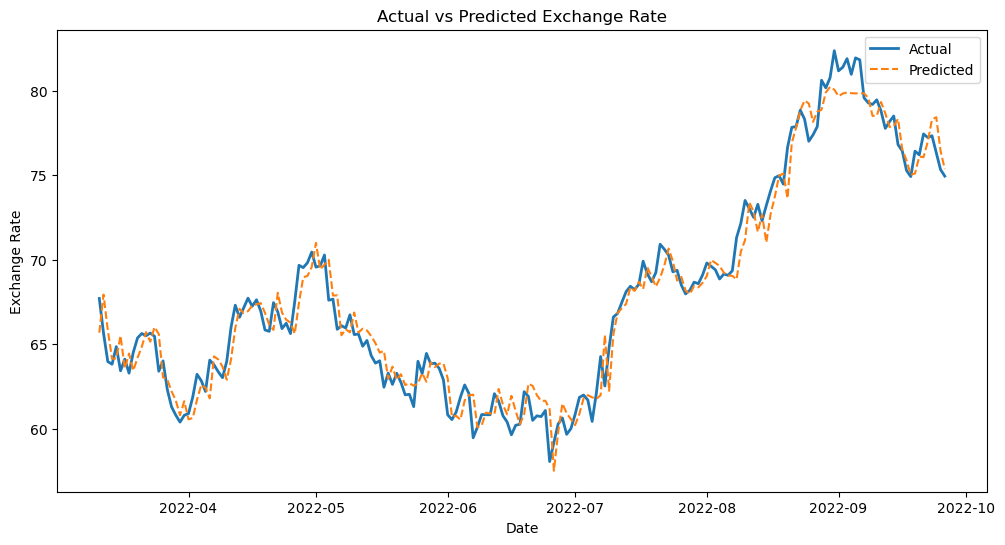

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Загрузка данных (пример с фиктивными данными)
dates = pd.date_range(start="2020-01-01", periods=1000, freq='D')
exchange_rates = np.cumsum(np.random.randn(1000)) + 75  # Искусственный тренд

data = pd.DataFrame({'date': dates, 'exchange_rate': exchange_rates})
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Создание признаков
data['day'] = data.index.day
data['month'] = data.index.month
data['year'] = data.index.year
data['prev_day'] = data['exchange_rate'].shift(1)
data.dropna(inplace=True)

# Разделение на train/test
X = data.drop(columns=['exchange_rate'])
y = data['exchange_rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Масштабирование
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение модели
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Предсказания
y_pred = model.predict(X_test_scaled)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae:.2f}, RMSE: {rmse:.2f}')

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', linewidth=2)
plt.plot(y_test.index, y_pred, label='Predicted', linestyle='dashed')
plt.legend()
plt.title('Actual vs Predicted Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()